<p style="color:white; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right">schlick[at]u-bordeaux.fr</span>
<span style="font-size:40px; font-style:normal"><b>GENERATION D'IMAGES</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Version 2023-01</span>
<span style="width:49%; display:inline-block; text-align:right">Licence CC-BY-NC-ND</span></p>

L'objectif de cette feuille d'exercices est d'illustrer le principe de ***génération d'images par algorithmes***. L'ensemble des exercices vont mettre en oeuvre les fonctionnalités fournies par le package **`numpy`**, basées sur l'utilisation du conteneur **`array`** et des fonctions universelles pour manipuler les données stockées dans ce conteneur. Avant de commencer cette feuille d'exercices, il est donc fortement recommandé de relire le notebook **04-Numpy.ipynb** qui contient les éléments de cours correspondants.

> **Remarque importante :** Pour bénéficier du gain de vitesse fourni par le mécanisme de **vectorisation** qu'offrent les fonctions universelles, il est primordial de raisonner uniquement en manipulations globales des vecteurs et des matrices, et ceci pour l'ensemble des traitements à effectuer. Par conséquent ***aucune boucle **`for`** ou **`while`** ne devra être utilisée dans aucun des exercices de cette feuille !***

Le package **`numpy`** permet de créer des matrices de dimension quelconque, dont les éléments doivent tous être de même type. Mais dans le cadre de l'imagerie numérique, ***on va exclusivement utiliser 5 formes de matrices*** :

- Matrice MxN de booléens = **image binaire** (chaque pixel est défini par un booléen)
- Matrice MxN de réels = **image monochrome à valeurs continues** (chaque pixel est défini par un réel)
- Matrice MxN d'entiers = **image monochrome à valeurs discrètes** (chaque pixel est défini par un entier)
- Matrice MxNx3 de réels = **image polychrome à valeurs continues** (chaque pixel est défini par trois réels)
- Matrice MxNx3 d'entiers = **image polychrome à valeurs discrètes** (chaque pixel est défini par trois entiers)

---
Pour simplifier la vérification du code à écrire dans les exercices, on fournit une fonction **`view`** qui permet d'afficher une matrice **`numpy`** sous la forme d'une image insérée dans le notebook, à condition qu'elle utilise l'une des 5 formes définies ci-dessus. Voici quelques exemple de mise en oeuvre :

In [1]:
import numpy as np # import du package 'numpy' avec alias 'np'
from SRC.tools import show, view # import de deux fonctions du module 'tools'

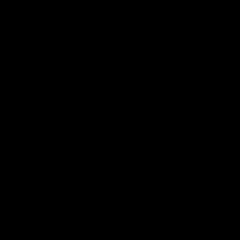

img.shape ━► (240, 240)
img.size ━► 57600
img.dtype ━► float64
img.nbytes ━► 460800
img ━►
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

img[0,0] ━► 0.0
img[0,:5] ━► [0. 0. 0. 0. 0.]
img[-1,::20] ━► [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [2]:
img = np.zeros((240, 240)) # image monochrome noire (valeurs réelles pour les pixels)
#img = np.ones((240, 240)) # image monochrome blanche (valeurs réelles pour les pixels)
#img = np.full((240, 240), False) # image binaire noire (valeurs booléennes pour les pixels)
#img = np.full((240, 240), 0) # image monochrome noire (valeurs entières pour les pixels)
#img = np.full((240, 240), 0.0) # image monochrome noire (valeurs réelles pour les pixels)
#img = np.full((240, 240, 3), [0,0,0]) # image polychrome noire (valeurs entières pour les pixels)
#img = np.full((240, 240, 3), [1,0,0]) # image polychrome rouge (valeurs entières pour les pixels)
#img = np.full((240, 240, 3), [1,0.5,0]) # image polychrome orange (valeurs réelles pour les pixels)
#img = np.full((240, 240, 3), [255,0,0]) # image polychrome rouge (valeurs entières pour les pixels)

view(img) # affichage de la matrice sous forme d'image
show("img.shape; img.size; img.dtype; img.nbytes; img#;") # affichage des attributs de la matrice
show("img[0,0]; img[0,:5]; img[-1,::20]") # affichage de pixels ou tranches de pixels

<h2 style="padding:16px; color:white; background:#07D">Exercice A1 - Génération d'aplats rectangulaires [grids]</h2>

Ecrire les instructions Python permettant de générer les 12 images de la figure ci-dessous. Chaque image individuelle devra avoir une taille de 240 sur 240. Vous aurez besoin des fonctions suivantes fournies par le package **`numpy`** (à vous de trouver leur rôle et ceux de leurs paramètres) :

- **`np.indices(size)`**
- **`np.repeat(array, repeats, [axis=n])`**
- **`np.min(array_or_tuple_of_arrays, [axis=n])`**
- **`np.max(array_or_tuple_of_arrays, [axis=n])`**
- **`np.random.randint(low, high, size)`**
- **`np.random.random(size)`**

![](IMG/grids.png 'grids.png')

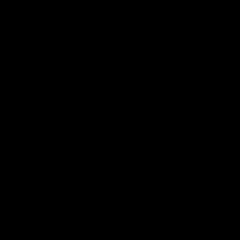

(240, 240) / min = 0.0 / max = 0.0


In [3]:
# TODO
view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

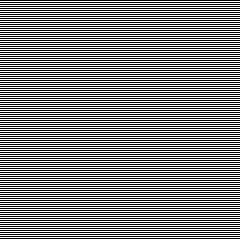

(240, 240) / min = 0 / max = 1


In [4]:
rows, cols = np.indices((240, 240)) # création des matrices d'indices pour une image 240x240

# En appliquant un 'modulo 2', les lignes paires deviennent noires (= 0) et les impaires blanches (= 1)
img = rows % 2 # pixel-stripes (largeur = 1 pixel)

# Pour augmenter l'épaisseur des lignes, on rajoute une division entière sur les indices de lignes
#img = rows//6 % 2 # stripes (largeur = 6 pixels)

# Pour l'échiquier, le 'modulo 2' s'applique à la somme des indices de lignes et de colonnes
#img = (rows + cols) % 2 # pixel-chessboard (taille des cases = 1 pixel)
#img = (rows//30 + cols//30) % 2 # chessboard (taille des cases = 30x30 pixels)

# Pour les boîtes imbriquées, on calcule la distance minimale de chaque pixel aux bordures N,E,S,W
#img = np.min((rows, cols, 239-rows, 239-cols), axis=0) % 2 # pixel-boxes (largeur = 1 pixel)
#img = np.min((rows//16, cols//16, 14-rows//16, 14-cols//16), axis=0) % 2 # boxes (largeur = 16 pixels)

view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

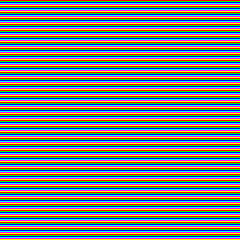

(240, 240, 3) / min = 0 / max = 1


In [5]:
# On définit une palette de couleurs sous la forme d'une matrice à 2 dimensions (6 rows, 3 cols)
colors = np.array([[1,0,0], [0,1,0], [0,0,1], [0,1,1], [1,0,1], [1,1,0]]) # colormap = RGBCMY

# On utilise les exemples précédents en tant qu'indices dans la palette de couleurs
img = colors[rows % 6] # colormap pixel-stripes (largeur = 1 pixel)
#img = colors[rows//6 % 6] # colormap stripes (largeur = 6 pixels)
#img = colors[(rows + cols) % 6] # colormap pixel-chessboard (taille des cases = 1 pixel)
#img = colors[(rows//30 + cols//30) % 6] # colormap chessboard (taille des cases = 30x30 pixels)
#img = colors[np.min((rows, cols, 239-rows, 239-cols), axis=0) % 6] # colormap pixel-boxes
#img = colors[np.min((rows//16, cols//16, 14-rows//16, 14-cols//16), axis=0) % 6] # colormap boxes

view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

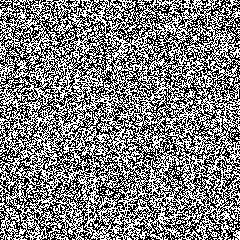

(240, 240) / min = 0 / max = 1


In [6]:
# La fonction 'randint' crée une matrice de valeurs aléatoires entières dans l'intervalle [low, high]
img = np.random.randint(0, 2, (240,240)) # binary pixel noise

# Pour obtenir des aplats de noirs ou blancs, on peut employer l'une des deux techniques suivantes :
# version 1 : on crée une matrice aléatoire 40x40 et on s'en sert de palette par blocs de 6x6
noise = np.random.randint(0, 2, (40,40)) # on crée une palette 
#img = noise[rows // 6, cols // 6] # binary tile noise
# version 2 : on crée une matrice aléatoire 40x40 et on répète chaque pixel 6x en horizontal et vertical
#img = noise.repeat(6, axis=0).repeat(6, axis=1) # binary tile noise

# La fonction 'random' crée une matrice de valeurs aléatoires réelles dans l'intervalle [0, 1[
#img = np.random.random((240,240)) # grayscale pixel noise
#img = np.random.random((40,40)).repeat(6, axis=0).repeat(6, axis=1) # grayscale tile noise

# La combinaison de deux images s'effectue le plus souvent par addition ou multiplication des pixels
chess = (rows//30 + cols//30) % 2; noise = np.random.random((240,240))
#img = 0.6*chess + 0.4*noise # noisy chessboard (additive noise)
#img = chess * (0.5 + 0.5*noise) # noisy chessboard (multiplicative noise)

view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

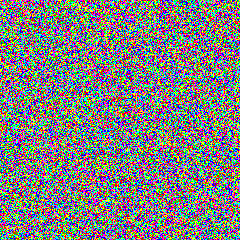

(240, 240, 3) / min = 0 / max = 1


In [7]:
# Les valeurs aléatoires entières peuvent également être utilisées pour indexer une palette de couleurs
img = colors[np.random.randint(0, 6, (240,240))] # colormap pixel noise
#img = colors[np.random.randint(0, 6, (40,40)).repeat(6, axis=0).repeat(6, axis=1)] # colormap tile noise

# Ou alors, on peut directement générer des valeurs aléatoires indépendamment pour les canaux R, G et B
#img = np.random.random((240,240,3)) # color pixel noise
#img = np.random.random((40,40,3)).repeat(6,axis=0).repeat(6,axis=1) # color tile noise

# En annulant le canal R, on se limite à un bruit de couleurs dans la gamme des bleus-verts
#img = np.random.random((240,240,3)); img[:,:,0] = 0 # blue-green pixel noise # alternative: img[...,0]

# La combinaison d'images polychromes est similaire à celle des images monochromes
colorchess = colors[(rows//30 + cols//30) % 6]; colornoise = np.random.random((240,240,3))
#img = 0.5*colorchess + 0.5*colornoise # noisy color chessboard (additive noise)
#img = colorchess * (0.2 + 0.8*colornoise) # noisy color chessboard (multiplicative noise)

view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

<h2 style="padding:16px; color:white; background:#07D">Exercice A2 - Génération de dégradés axiaux [ramps]</h2>

Ecrire les instructions Python permettant de générer les images de la figure ci-dessous. En plus de certaines des fonctions de l'exercice précédent, vous aurez également besoin des fonctions suivantes :

- **`np.linspace(start, stop, samples)`**
- **`np.tile(array, repeats)`**
- **`np.divmod(number_or_array, number_or_array)`**
- **`np.where(test, true_value, false_value)`**

![](IMG/ramps.png 'ramps.png')

In [8]:
# TODO
#view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

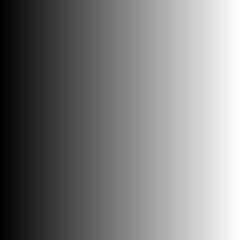

(240, 240) / min = 0 / max = 239


In [9]:
# On peut générer un dégradé linéaire en utilisant directement la matrice des indices de lignes/colonnes
# mais cela a l'inconvénient de faire dépendre les intensités des pixels de la dimension de l'image
img = cols # left-to-right horizontal ramp
#img = rows # top-to-bottom vertical ramp

# Pour décorréler la taille de l'image de la variation de l'intensité, on va utiliser la fonction
# 'linspace' afin de créer un dégradé sur l'intervalle [0, 1[ (attention à ne pas inclure la valeur 1)
ramp = np.linspace(0, 0.999999999, 240) # linear ramp (vector : 240 cols)
#print('vector shape =', ramp.shape)

# La fonction 'tile' (carrelage) est une généralisation de la fonction 'repeat' qui permet de répéter
# une matrice complète et non pas simplement une valeur (ici 240x en vertical et 1x en horizontal)
ramp = np.tile(ramp, (240, 1)) # linear ramp (matrix : 240 rows, 240 cols)
#print('matrix shape =', ramp.shape)

# On peut alors afficher directement le dégradé horizontal
#img = ramp  # left-to-right horizontal ramp
# ou inverser le sens du dégradé
#img = ramp[:,::-1] # right-to-left horizontal ramp
# ou alors transposer la matrice (opérateur .T) pour obtenir un dégradé vertical
#img = ramp.T # top-to-bottom vertical ramp
# ou encore combiner les 2 opérations
#img = ramp.T[::-1,:] # bottom-to-top vertical ramp

view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

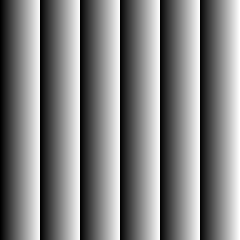

(240, 240) / min = 0.0 / max = 0.9999999940000004


In [10]:
# la solution la plus flexible pour créer des motifs périodiques est d'utiliser l'opérateur 'modulo' :
pramp = 6 * ramp % 1 # periodic ramps (6 ramps)
img = pramp # horizontal periodic ramps (6 ramps)
#img = pramp.T # vertical periodic ramps (6 ramps)

# note : si la périodicité s'effectue le long d'un axe de la matrice (vertical ou horizontal), on
# peut également utiliser la fonction 'tile' sur une version sous-échantillonné du dégradé :
#img = np.tile(ramp.T[::6,:], (6, 1)) # répétition du dégradé sous-échantillonné

# par défaut, le dégradé obtenu par 'linspace' est linéaire (comme son nom l'indique)
# un moyen classique pour modifier cela est d'appliquer une exponentiation au résultat
#img **= 0.4 # on applique un éclaircissement (exponentiation avec puissance < 1)
#img **= 2.5 # on applique un assombrissement (exponentiation avec puissance > 1)

# pour obtenir des dégradés colorés, il suffit de multiplier l'intensité par une couleur
# mais pour cela, il faut rendre les matrices compatibles en rajoutant une troisième dimension
# note : la notation 'None' signifie "cette dimension existe, mais elle est vide"
#img = colors[rows // 40] * img[:,:,None] # vertical color ramps (1 color per ramp)

# on peut obtenir des dégradés en diagonal par somme d'un dégradé horizontal et d'un dégradé vertical
#img = 3 * (ramp + ramp.T) % 1 # diagonal periodic ramps (6 ramps)

# note : ici la fonction 'tile' appliquée au dégradé sous-échantillonné, donne un résultat différent
#img = np.tile((ramp + ramp.T)[::6,::6], (6, 6))

# comme précédemment, on peut associer une couleur spécifique à chacun des 6 dégradés, pour cela,
# la fonction 'divmod' qui calcule simultanément le quotient et le reste d'une division est idéale
index, dramp = np.divmod(3 * (ramp + ramp.T), 1) # colormap index + diagonal periodic ramps
#img = colors[index.astype(int)] * dramp[:,:,None] ** 0.4 # diagonal color ramps (1 color per ramp)

view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

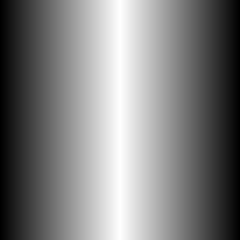

(240, 240) / min = 0.0 / max = 0.9958159005857741


In [11]:
# Pour créer un dégradé symétrique, on va utiliser la fonction 'where' qui permet de
# traiter différemment les zones d'une matrice, en fonction d'une expression booléenne

# On construit une fonction 'mirror' qui permet de 'symétriser' toute donnée dans l'intervalle [0,1]
mirror = lambda t: np.where(t < 0.5, 2*t, 2-2*t)

# On peut alors appliquer cette fonction 'mirror' directement au dégradé 'ramp' généré précédemment
sramp = mirror(ramp) # symmetric linear ramp
img = sramp  # horizontal symmetric ramp
#img = sramp.T # vertical symmetric ramp

# Pour créer une version périodique, on va créer un dégradé périodique puis lui appliquer une symétrie
#img = mirror(3 * ramp % 1) # horizontal symmetric periodic ramps (3 ramps)

# Pour donner l'illusion de tuyaux cylindriques, il faut modifier un peu le dégradé trop "anguleux",
# pour cela, une technique très classique est d'appliquer une fonction de lissage au résultat brut

# Parmi les fonctions de lissage usuelles, on trouve la fonction 'smooth' de Hermite, polynôme cubique
# qui possède les propriétés suivantes : f(0) = 0, f'(0) = 0, f(1) = 1, f'(1) = 0, f(1-t) = 1-f(t)
smooth = lambda t: t*t*(3-2*t) # Hermite cubic function (= smooth step)
#img = smooth(img) # on lisse le résultat avec la fonction 'smooth' de Hermite

# Pour créer des dégradés inclinés, on va à nouveau utiliser la fonction 'divmod'
#index, spramp = np.divmod(3 * (ramp + ramp.T), 1) # diagonal periodic ramps (6 ramps)
index, spramp = np.divmod(6 * (0.4*ramp + 0.6*ramp.T), 1) # slanted periodic ramps (6 ramps)
spramp = smooth(mirror(spramp)) ** 0.4 # on symmétrise, on lisse et on éclaircit le dégradé obtenu
#img = colors[index.astype(int)] * spramp[:,:,None] # slanted color ramps (6 colors)

view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

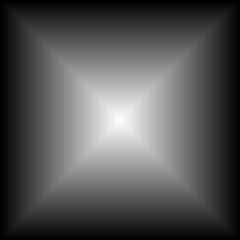

(240, 240) / min = 0.0 / max = 0.9958159005857741


In [15]:
# On repart du dégradé horizontal symétrique créé précédemment, et on applique diverses opérations :
sramp = mirror(ramp) # horizontal symmetric ramp
img = np.min((sramp, sramp.T), axis=0) # min entre le dégradé et sa transposée
#img = np.max((sramp, sramp.T), axis=0) # max entre le dégradé et sa transposée

bramp = np.min((sramp, sramp.T), axis=0) # box ramp
index, bpramp = np.divmod(7.5*bramp, 1) # periodic box ramp (7.5 ramps)
index, bpramp = index % 6, smooth(mirror(bpramp)) ** 0.25 # on symmétrise, on lisse et on éclaircit
#img = colors[index.astype(int)] * bpramp[:,:,None]

view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

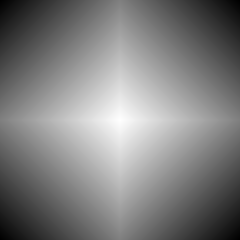

(240, 240) / min = 0.0 / max = 0.9958159005857741


In [13]:
# On repart du dégradé horizontal symétrique créé précédemment, et on applique diverses opérations :
img = 0.5*np.max((sramp, sramp.T), axis=0) + 0.5*np.min((sramp, sramp.T), axis=0) # (min + max) / 2
#img = (np.max((sramp, sramp.T), axis=0) - np.min((sramp, sramp.T), axis=0)) ** 0.5 # sqrt(max - min)

spramp = mirror(8*ramp % 1) # horizontal periodic symmetric ramps (8 ramps)
spramp = smooth(spramp) ** 0.25 # on applique un lissage puis un éclaircissement
#img = 0.5*np.max((spramp, spramp.T), axis=0) + 0.5*np.min((spramp, spramp.T), axis=0)
#img = colorchess * img[:,:,None]

view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

<h2 style="padding:16px; color:white; background:#07D">Exercice A3 - Génération de dégradés circulaires [spots]</h2>

Ecrire les instructions Python permettant de générer les images de la figure ci-dessous. En plus de certaines des fonctions de l'exercice précédent, vous aurez également besoin des fonctions suivantes :

- **`np.meshgrid(samples_for_x, samples_for_y)`**
- **`np.clip(array, lower_bound, upper_bound)`**
- **`np.hstack(tuple_of_arrays)`** ou **`np.vstack(tuple_of_arrays)`**
- **`np.sin(array)`** ou **`np.cos(array)`** ou **`np.atan2(y, x)`**

![](IMG/spots.png 'spots.png')

In [14]:
# TODO
#view(img); print(img.shape, '/ min =', img.min(), '/ max =', img.max())

---